# Insights for Reddit Data Predictions from Ensemble Model

This notebook does an exploratory data analysis on the predictions made by the ensemble model on the reddit data . The sections in this notebook are:

- Data Loading and Setup
- Exploratory data anlaysis
    - Bar Charts of number of occurences
    - Correlation Matrix between toxic labels
    - WordClouds for toxic labels
    - Biagram Analysis 
    - Sentiment Analysis  

In [0]:
#!pip install Pillow

In [0]:
#import required packages
import pandas as pd 
import numpy as np
import gc
import time
import warnings
from scipy import sparse
import scipy.stats as ss

# **Data Loading and Setup**

Loading the prediction results 

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
reddit_result = pd.read_csv('drive/My Drive/BT4222/Working File/final_reddit_result.csv')


In [4]:
reddit_result.head()

Unnamed: 0  ...                                       comment_text
0           0  ...  Welcome to r/Coronavirus! We have a very speci...
1           1  ...  I was in Waikiki where two confirmed cases wer...
2           2  ...  I'm a student at Lake Washington School Distrc...
3           3  ...                   will disney close it’s us parks?
4           4  ...  I think we will reach 100k cases today. We hav...

[5 rows x 8 columns]

In [0]:
#converting all the scores into binary values based on their probability values
reddit_result['new_toxic'] = np.where(reddit_result['toxic']>=0.5, 1, 0)
reddit_result['new_severe_toxic'] = np.where(reddit_result['severe_toxic']>=0.5, 1, 0)
reddit_result['new_obscene'] = np.where(reddit_result['obscene']>=0.5, 1, 0)
reddit_result['new_threat'] = np.where(reddit_result['threat']>=0.5, 1, 0)
reddit_result['new_insult'] = np.where(reddit_result['insult']>=0.5, 1, 0)
reddit_result['new_identity_hate'] = np.where(reddit_result['identity_hate']>=0.5, 1, 0)
#train['new_non_toxic'] = np.where(train['non_toxic']==True, True, False)


In [0]:
#renaming the columns in the new modified dataset
reddit_binary_pred = reddit_result[['comment_text','new_toxic','new_severe_toxic','new_obscene','new_threat','new_insult','new_identity_hate']]

In [7]:
reddit_binary_pred

comment_text  ...  new_identity_hate
0      Welcome to r/Coronavirus! We have a very speci...  ...                  0
1      I was in Waikiki where two confirmed cases wer...  ...                  0
2      I'm a student at Lake Washington School Distrc...  ...                  0
3                       will disney close it’s us parks?  ...                  0
4      I think we will reach 100k cases today. We hav...  ...                  0
...                                                  ...  ...                ...
11720  It hasn’t. It’s been established that false ne...  ...                  0
11721                  its gonne happen in europe to lol  ...                  0
11722  Not even "sick" per se, just still shedding vi...  ...                  0
11723  they don't know if it's misdiagnosis/false neg...  ...                  0
11724  Exactly. The guy I was responding to made it s...  ...                  0

[11725 rows x 7 columns]

In [0]:
#reverting the columns to the original toxic labels 
reddit_binary_pred.columns = ['comment_text',
       'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [10]:
reddit_binary_pred

comment_text  ...  identity_hate
0      Welcome to r/Coronavirus! We have a very speci...  ...              0
1      I was in Waikiki where two confirmed cases wer...  ...              0
2      I'm a student at Lake Washington School Distrc...  ...              0
3                       will disney close it’s us parks?  ...              0
4      I think we will reach 100k cases today. We hav...  ...              0
...                                                  ...  ...            ...
11720  It hasn’t. It’s been established that false ne...  ...              0
11721                  its gonne happen in europe to lol  ...              0
11722  Not even "sick" per se, just still shedding vi...  ...              0
11723  they don't know if it's misdiagnosis/false neg...  ...              0
11724  Exactly. The guy I was responding to made it s...  ...              0

[11725 rows x 7 columns]

In [12]:
# number of rows in training and test sets
nrow_reddit=reddit_binary_pred.shape[0]

print('There are ' + str(nrow_reddit) + ' rows in the reddit predictions')


There are 11725 rows in the reddit predictions


In [14]:
# check if there are missing labels
missing_label_reddit = reddit_binary_pred.isnull().sum()

print('For Reddit predicition:')
print(missing_label_reddit)


For Reddit predicition:
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


We can see that there is no missing labels for in the reddit predictions

# **Exploratory Data Analysis**


---



In [0]:
#!pip install wordcloud
#!pip install matplotlib==3.1.0
#!pip install matplotlib-venn

In [15]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn3

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
x=reddit_binary_pred.iloc[:,1:].sum()
x

toxic            272
severe_toxic       1
obscene          101
threat             3
insult            27
identity_hate      0
dtype: int64

## **Bar Charts of number of occurences**





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


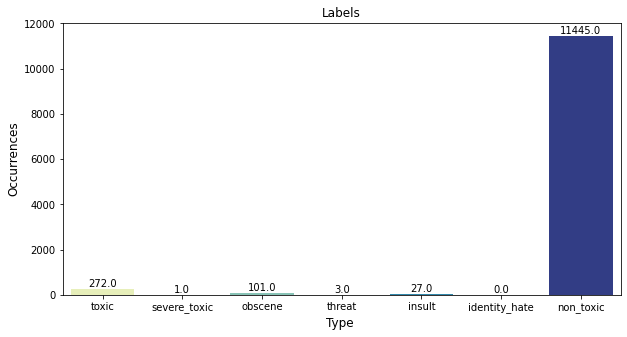

In [17]:
#marking comments without any toxic labels as "non_toxic"
rowsums=reddit_binary_pred.iloc[:,1:].sum(axis=1)
reddit_binary_pred['non_toxic']=(rowsums==0)
reddit_binary_pred['non_toxic'].sum()

x=reddit_binary_pred.iloc[:,1:].sum()
plt.figure(figsize=(10,5))
ax = sns.barplot(x.index, x.values,palette="YlGnBu")
plt.title("Labels")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

We obeserved that there is an imbalance in the dataset. Let's try drop the non-toxic column and view the distribution of labels more clearly

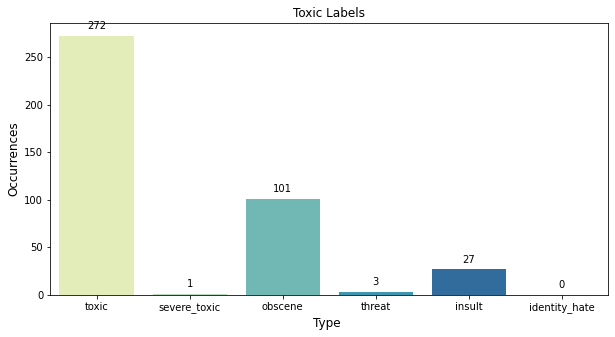

In [18]:
x=reddit_binary_pred.drop('non_toxic',axis=1).iloc[:,1:].sum()
plt.figure(figsize=(10,5))
ax = sns.barplot(x.index, x.values,palette="YlGnBu")
plt.title("Toxic Labels")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

As the sum of all labels > number of rows, entries are not uniquely labeled with one toxicity. 
For example, one comment can be labelled with both insult and obscene

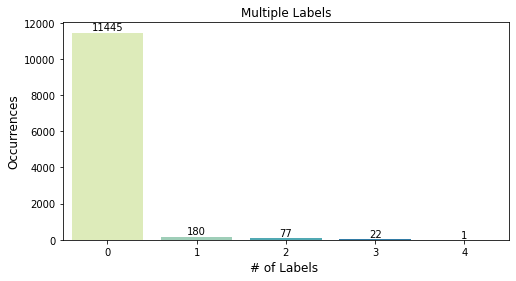

In [19]:
#compute the sum of labels
# 0: non_toxic
# 1: only one label for that particular entries
# >1: labeled with multiple labels 
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values,palette="YlGnBu")
plt.title("Multiple Labels")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('# of Labels ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

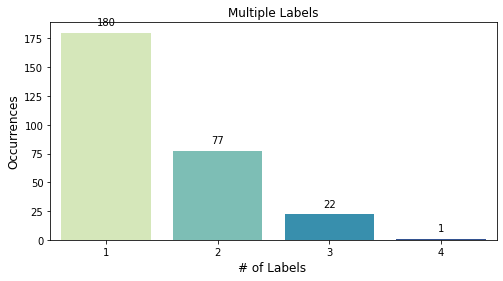

In [20]:
#drop non_toxic comments
x=rowsums.value_counts()
x = x.drop(0)
#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values,palette="YlGnBu")
plt.title("Multiple Labels")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('# of Labels ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [22]:
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
com_combi = reddit_binary_pred.groupby(cols)\
                    .size()\
                    .sort_values(ascending=False)\
                    .reset_index()\
                    .rename(columns={0: 'count'})
com_combi.head(n=10)

toxic  severe_toxic  obscene  threat  insult  identity_hate  count
0      0             0        0       0       0              0  11445
1      1             0        0       0       0              0    172
2      1             0        1       0       0              0     73
3      1             0        1       0       1              0     22
4      0             0        1       0       0              0      5
5      1             0        0       0       1              0      4
6      0             0        0       1       0              0      3
7      1             1        1       0       1              0      1

##**Correlation matrix between the toxic labels**

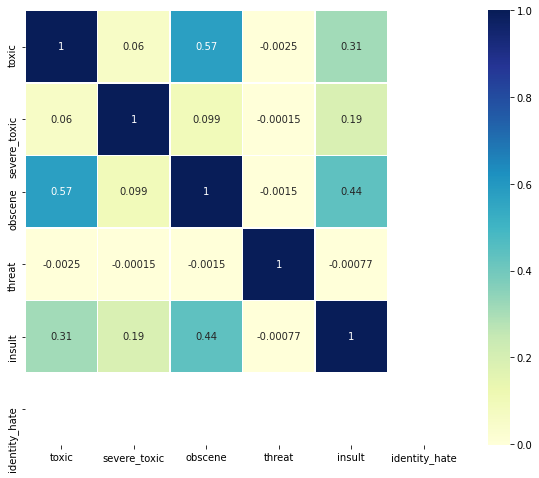

In [23]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(reddit_binary_pred.iloc[:,1:-1].corr(),annot=True,linewidths=.5,cmap="YlGnBu")
ax.set_aspect("equal")

### Here are some interesting findings from common combination and the correlation heatmap:
- toxic has high correlation with obscene
- obscene and insult has a relatively high correlation
- threat has relatively low correlation with the rest of other labels
- toxic and severe_toxic does not have high correlation. This may show that many of those labeled one, did not labeled with the other

### Now let's look into the venn diagrams for some of the common combinations

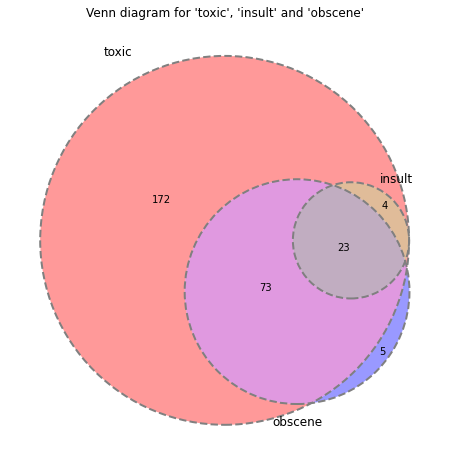

In [24]:
from matplotlib_venn import venn2, venn2_circles,venn3, venn3_circles

t = reddit_binary_pred[(reddit_binary_pred['toxic'] == 1) & (reddit_binary_pred['insult'] == 0) & (reddit_binary_pred['obscene'] == 0)].shape[0]
i = reddit_binary_pred[(reddit_binary_pred['toxic'] == 0) & (reddit_binary_pred['insult'] == 1) & (reddit_binary_pred['obscene'] == 0)].shape[0]
o = reddit_binary_pred[(reddit_binary_pred['toxic'] == 0) & (reddit_binary_pred['insult'] == 0) & (reddit_binary_pred['obscene'] == 1)].shape[0]

t_i = reddit_binary_pred[(reddit_binary_pred['toxic'] == 1) & (reddit_binary_pred['insult'] == 1) & (reddit_binary_pred['obscene'] == 0)].shape[0]
t_o = reddit_binary_pred[(reddit_binary_pred['toxic'] == 1) & (reddit_binary_pred['insult'] == 0) & (reddit_binary_pred['obscene'] == 1)].shape[0]
i_o = reddit_binary_pred[(reddit_binary_pred['toxic'] == 0) & (reddit_binary_pred['insult'] == 1) & (reddit_binary_pred['obscene'] == 1)].shape[0]

t_i_o = reddit_binary_pred[(reddit_binary_pred['toxic'] == 1) & (reddit_binary_pred['insult'] == 1) & (reddit_binary_pred['obscene'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic', 'insult' and 'obscene'")
v = venn3(subsets = (t, i, t_i, o, t_o, i_o, t_i_o), set_labels=('toxic', 'insult', 'obscene'))
c = venn3_circles(subsets = (t, i, t_i, o, t_o, i_o, t_i_o),linestyle='dashed', linewidth=2, color="gray")
plt.show()


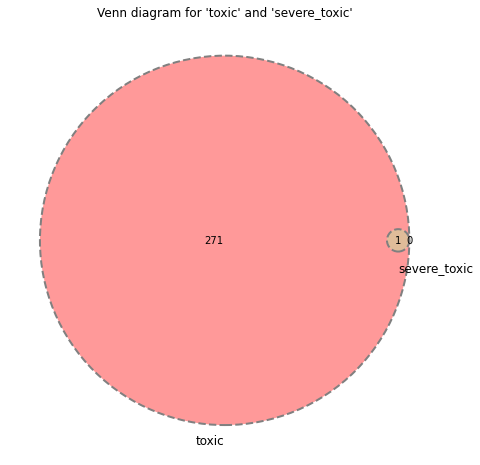

In [25]:
t = reddit_binary_pred[(reddit_binary_pred['toxic'] == 1) & (reddit_binary_pred['severe_toxic'] == 0)].shape[0]
s = reddit_binary_pred[(reddit_binary_pred['toxic'] == 0) & (reddit_binary_pred['severe_toxic'] == 1)].shape[0]

t_s = reddit_binary_pred[(reddit_binary_pred['toxic'] == 1) & (reddit_binary_pred['severe_toxic'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
v = venn2(subsets = (t, s, t_s), set_labels=('toxic', 'severe_toxic'))
c = venn2_circles(subsets = (t, s, t_s),linestyle='dashed', linewidth=2, color="gray")
plt.show()


We can observe that severe_toxic is a subgroup of toxic group. 

## **WordClouds**

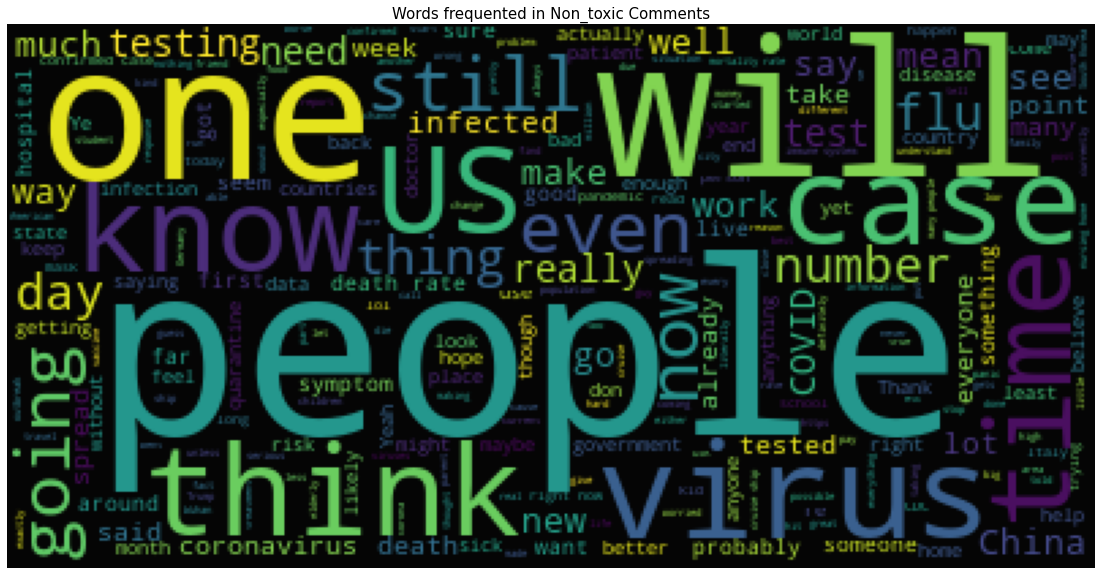

In [26]:
stopword=set(STOPWORDS)
#for non_toxic comments
subset=reddit_binary_pred[reddit_binary_pred.non_toxic==True]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Non_toxic Comments", fontsize=15)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

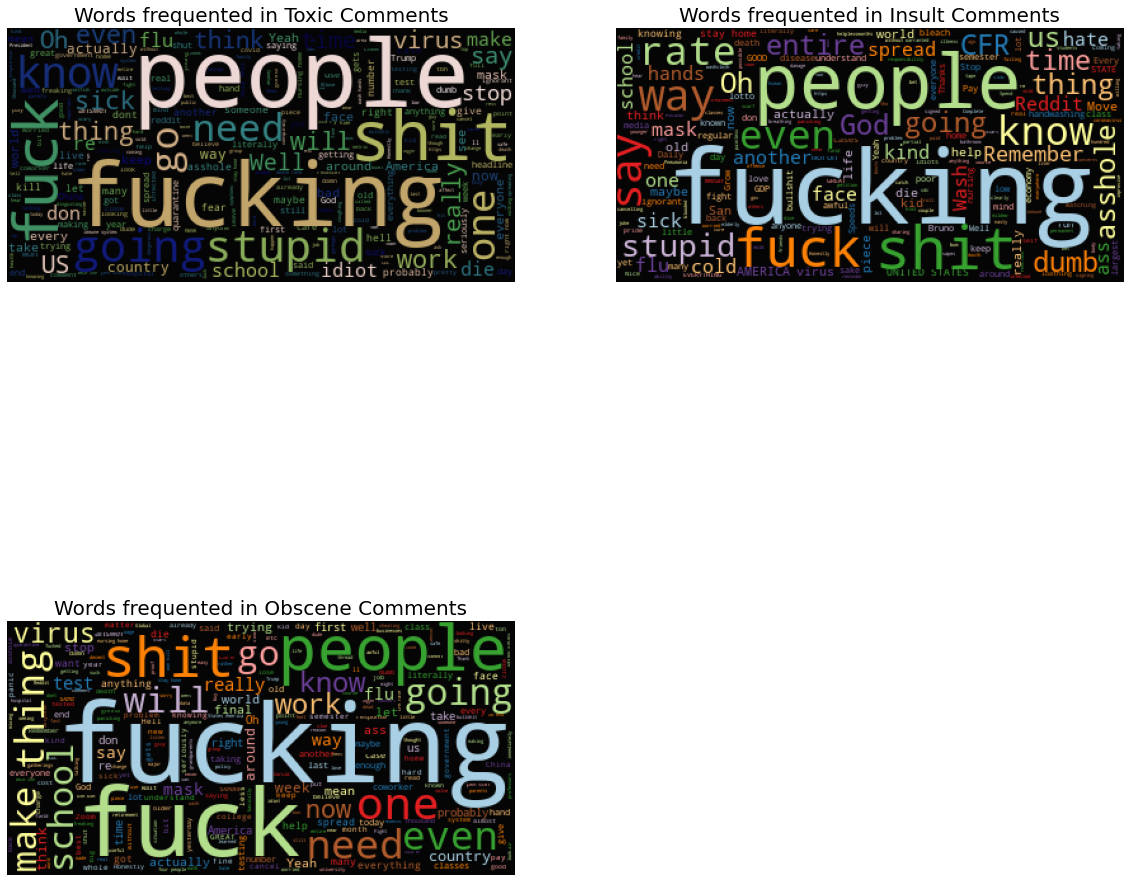

In [27]:
#wordcloud for clean comments
subset=reddit_binary_pred[reddit_binary_pred.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)



#insult
plt.subplot(222)
subset=reddit_binary_pred[reddit_binary_pred.insult==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Insult Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)




#obscene
plt.subplot(223)
subset=reddit_binary_pred[reddit_binary_pred.obscene==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Obscene Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)





plt.show()


## **Bigram Analysis**

Creating Bigrams

In [30]:
import nltk
import re
from nltk import bigrams
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
##################
# Text Cleaning  #
##################

# Spelling correction is based on Peter Norvig’s “How to Write a Spelling Corrector” as implemented in the pattern 
# library. It is about 70% accurate 
def spelling_correction(row):
    b = TextBlob(row)
#     print(b)
    return b.correct()


def clean_text(text, remove_stopwords = False):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()

    # Replace contractions with their longer forms 
    # A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
    contractions = { "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
    "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
    "he'd've": "he would have", "he'll": "he will", "he's": "he is", "how'd": "how did", "how'll": "how will", "how's": "how is",
    "i'd": "i would", "i'll": "i will", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'll": "it will", 
    "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not",
    "must've": "must have", "mustn't": "must not", "needn't": "need not", "oughtn't": "ought not", "shan't": "shall not",
    "sha'n't": "shall not", "she'd": "she would", "she'll": "she will", "she's": "she is", "should've": "should have",
    "shouldn't": "should not","that'd": "that would", "that's": "that is", "there'd": "there had", "there's": "there is", "they'd": "they would",
    "they'll": "they will", "they're": "they are", "they've": "they have", "wasn't": "was not", "we'd": "we would", "we'll": "we will",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what're": "what are", "what's": "what is",
    "what've": "what have", "where'd": "where did", "where's": "where is", "who'll": "who will", "who's": "who is", "won't": "will not",
    "wouldn't": "would not", "you'd": "you would", "you'll": "you will", "you're": "you are"}

    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Clean the text
    # reference: https://medium.com/@sabber/classifying-yelp-review-comments-using-lstm-and-word-embeddings-part-1-eb2275e4066b
    # test site: https://regex101.com/
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)   
    text = re.sub(r"\s{2,}", " ", text)
    
    #remove twitter @username and html link 
    test = re.sub(r"@\w+", " ", text)
    test = re.sub(r"https\w+", " ", text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
    
    return text


def text_preprocessing(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: clean_text(x , remove_stopwords=True))
    
    # spelling correction is extremely slow......took me around 45 mins to run
#     df[column_name] = df[column_name].progress_apply(lambda x: spelling_correction(x))
    
    return df


In [0]:
from textblob import TextBlob

In [0]:
def getSubjectivity(Comment):
  blob = TextBlob(Comment)
  sub = blob.sentiment
  return sub.subjectivity


def getPolarity(Comment):
  blob = TextBlob(Comment)
  sub = blob.sentiment
  return sub.polarity


def text_sentiment_preprocessing(df, column_name):
    #slow - xx mins
    df['Text_Polarity'] = df[column_name].apply(lambda x: getPolarity(x))
    #
    df['Text_Subjectivity'] = df[column_name].apply(lambda y: getSubjectivity(y))
    
    return df
    


  

In [64]:
#Data Cleaning and Sentiment Processing on the dataset
print("Pre-processing training data - This will take some time")
text_preprocessing(reddit_binary_pred, 'comment_text')
text_sentiment_preprocessing(reddit_binary_pred, 'comment_text')


Pre-processing training data - This will take some time


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

comment_text  ...  Text_Subjectivity
0      welcome r coronavirus ! specific set rules htt...  ...           0.306548
1      waikiki two confirmed cases two weeks ago ende...  ...           0.393750
2      student lake washington school distrct seattle...  ...           0.439340
3                                  disney close us parks  ...           0.000000
4      think reach 100000 cases today already alot ca...  ...           0.000000
...                                                  ...  ...                ...
11720  established false negatives thing patients dis...  ...           0.728571
11721                            gonne happen europe lol  ...           0.700000
11722  even sick per se still shedding virus document...  ...           0.857143
11723  know misdiagnosis false negatives reinfected s...  ...           0.847222
11724  exactly guy responding made sound like establi...  ...           0.450000

[11725 rows x 10 columns]

In [65]:
reddit_binary_pred

comment_text  ...  Text_Subjectivity
0      welcome r coronavirus ! specific set rules htt...  ...           0.306548
1      waikiki two confirmed cases two weeks ago ende...  ...           0.393750
2      student lake washington school distrct seattle...  ...           0.439340
3                                  disney close us parks  ...           0.000000
4      think reach 100000 cases today already alot ca...  ...           0.000000
...                                                  ...  ...                ...
11720  established false negatives thing patients dis...  ...           0.728571
11721                            gonne happen europe lol  ...           0.700000
11722  even sick per se still shedding virus document...  ...           0.857143
11723  know misdiagnosis false negatives reinfected s...  ...           0.847222
11724  exactly guy responding made sound like establi...  ...           0.450000

[11725 rows x 10 columns]

In [0]:
#creating subsets of reddit_binary_pred based on toxic labels
toxic_subset=reddit_binary_pred[reddit_binary_pred.toxic==1]
severe_toxic_subset=reddit_binary_pred[reddit_binary_pred.severe_toxic==1]
obscene_subset=reddit_binary_pred[reddit_binary_pred.obscene==1]
threat_subset=reddit_binary_pred[reddit_binary_pred.threat==1]
insult_subset=reddit_binary_pred[reddit_binary_pred.insult==1]
identity_hate_subset=reddit_binary_pred[reddit_binary_pred.identity_hate==1]
non_toxic_subset=reddit_binary_pred[reddit_binary_pred.non_toxic==True]


In [68]:
non_toxic_subset.head(1)

comment_text  ...  Text_Subjectivity
0  welcome r coronavirus ! specific set rules htt...  ...           0.306548

[1 rows x 10 columns]

In [0]:
toxic_terms_bigram = [list(bigrams(list(comment.split()))) for comment in toxic_subset.comment_text]
severe_toxic_terms_bigram = [list(bigrams(list(comment.split()))) for comment in severe_toxic_subset.comment_text]
obscene_terms_bigram = [list(bigrams(list(comment.split()))) for comment in obscene_subset.comment_text]
threat_terms_bigram = [list(bigrams(list(comment.split()))) for comment in threat_subset.comment_text]
insult_terms_bigram = [list(bigrams(list(comment.split()))) for comment in insult_subset.comment_text]
identity_hate_terms_bigram = [list(bigrams(list(comment.split()))) for comment in identity_hate_subset.comment_text]
non_toxic_terms_bigram = [list(bigrams(list(comment.split()))) for comment in non_toxic_subset.comment_text]

Identifying the counts for co-occurences (biagrams)

In [0]:
import itertools
import collections

In [0]:
#creating bigrams for all comments in each toxic label
toxic_bigrams = list(itertools.chain(*toxic_terms_bigram))
severe_toxic_bigrams = list(itertools.chain(*severe_toxic_terms_bigram))
obscene_bigrams = list(itertools.chain(*obscene_terms_bigram))
threat_bigrams = list(itertools.chain(*threat_terms_bigram))
insult_bigrams = list(itertools.chain(*insult_terms_bigram))
identity_hate_bigrams = list(itertools.chain(*identity_hate_terms_bigram))
non_toxic_bigrams = list(itertools.chain(*non_toxic_terms_bigram))

In [0]:
# Create counter of words in clean bigrams for each toxic label
toxic_bigram_counts = collections.Counter(toxic_bigrams)
severe_toxic_bigram_counts = collections.Counter(severe_toxic_bigrams)
obscene_bigram_counts = collections.Counter(obscene_bigrams)
threat_bigram_counts = collections.Counter(threat_bigrams)
insult_bigram_counts = collections.Counter(insult_bigrams)
identity_hate_bigram_counts = collections.Counter(identity_hate_bigrams)
non_toxic_bigram_counts = collections.Counter(non_toxic_bigrams)

In [0]:
# Identifying the top 50 bigrams for each toxic label
top_toxic_bigrams = toxic_bigram_counts.most_common(50)
top_severe_toxic_bigrams =severe_toxic_bigram_counts.most_common(50) 
top_obscene_bigrams = obscene_bigram_counts.most_common(50)
top_threat_bigrams=threat_bigram_counts.most_common(50)
top_insult_bigrams=insult_bigram_counts.most_common(50)
top_identity_hate_bigrams=identity_hate_bigram_counts.most_common(50)
top_non_toxic_bigrams = non_toxic_bigram_counts.most_common(50) 

In [0]:
#convert tuple to dictionary
def toConvert(tup, di): 
    di = dict(tup) 
    return di 

In [0]:
toxic_dict = {}
severe_toxic_dict = {}
obscene_dict = {}
threat_dict = {}
insult_dict = {}
identity_hate_dict = {}
non_toxic_dict = {}
toxic_plot = toConvert(top_toxic_bigrams, toxic_dict) 
severe_toxic_plot = toConvert(top_severe_toxic_bigrams, severe_toxic_dict)
obscene_plot = toConvert(top_obscene_bigrams, obscene_dict)
threat_plot = toConvert(top_threat_bigrams, threat_dict)
insult_plot = toConvert(top_insult_bigrams, insult_dict)
identity_hate_plot = toConvert(top_identity_hate_bigrams, identity_hate_dict)
non_toxic_plot = toConvert(top_non_toxic_bigrams, non_toxic_dict) 

Creating bigram plots for toxic , obscene, insult and non-toxic

In [0]:
import networkx as nx

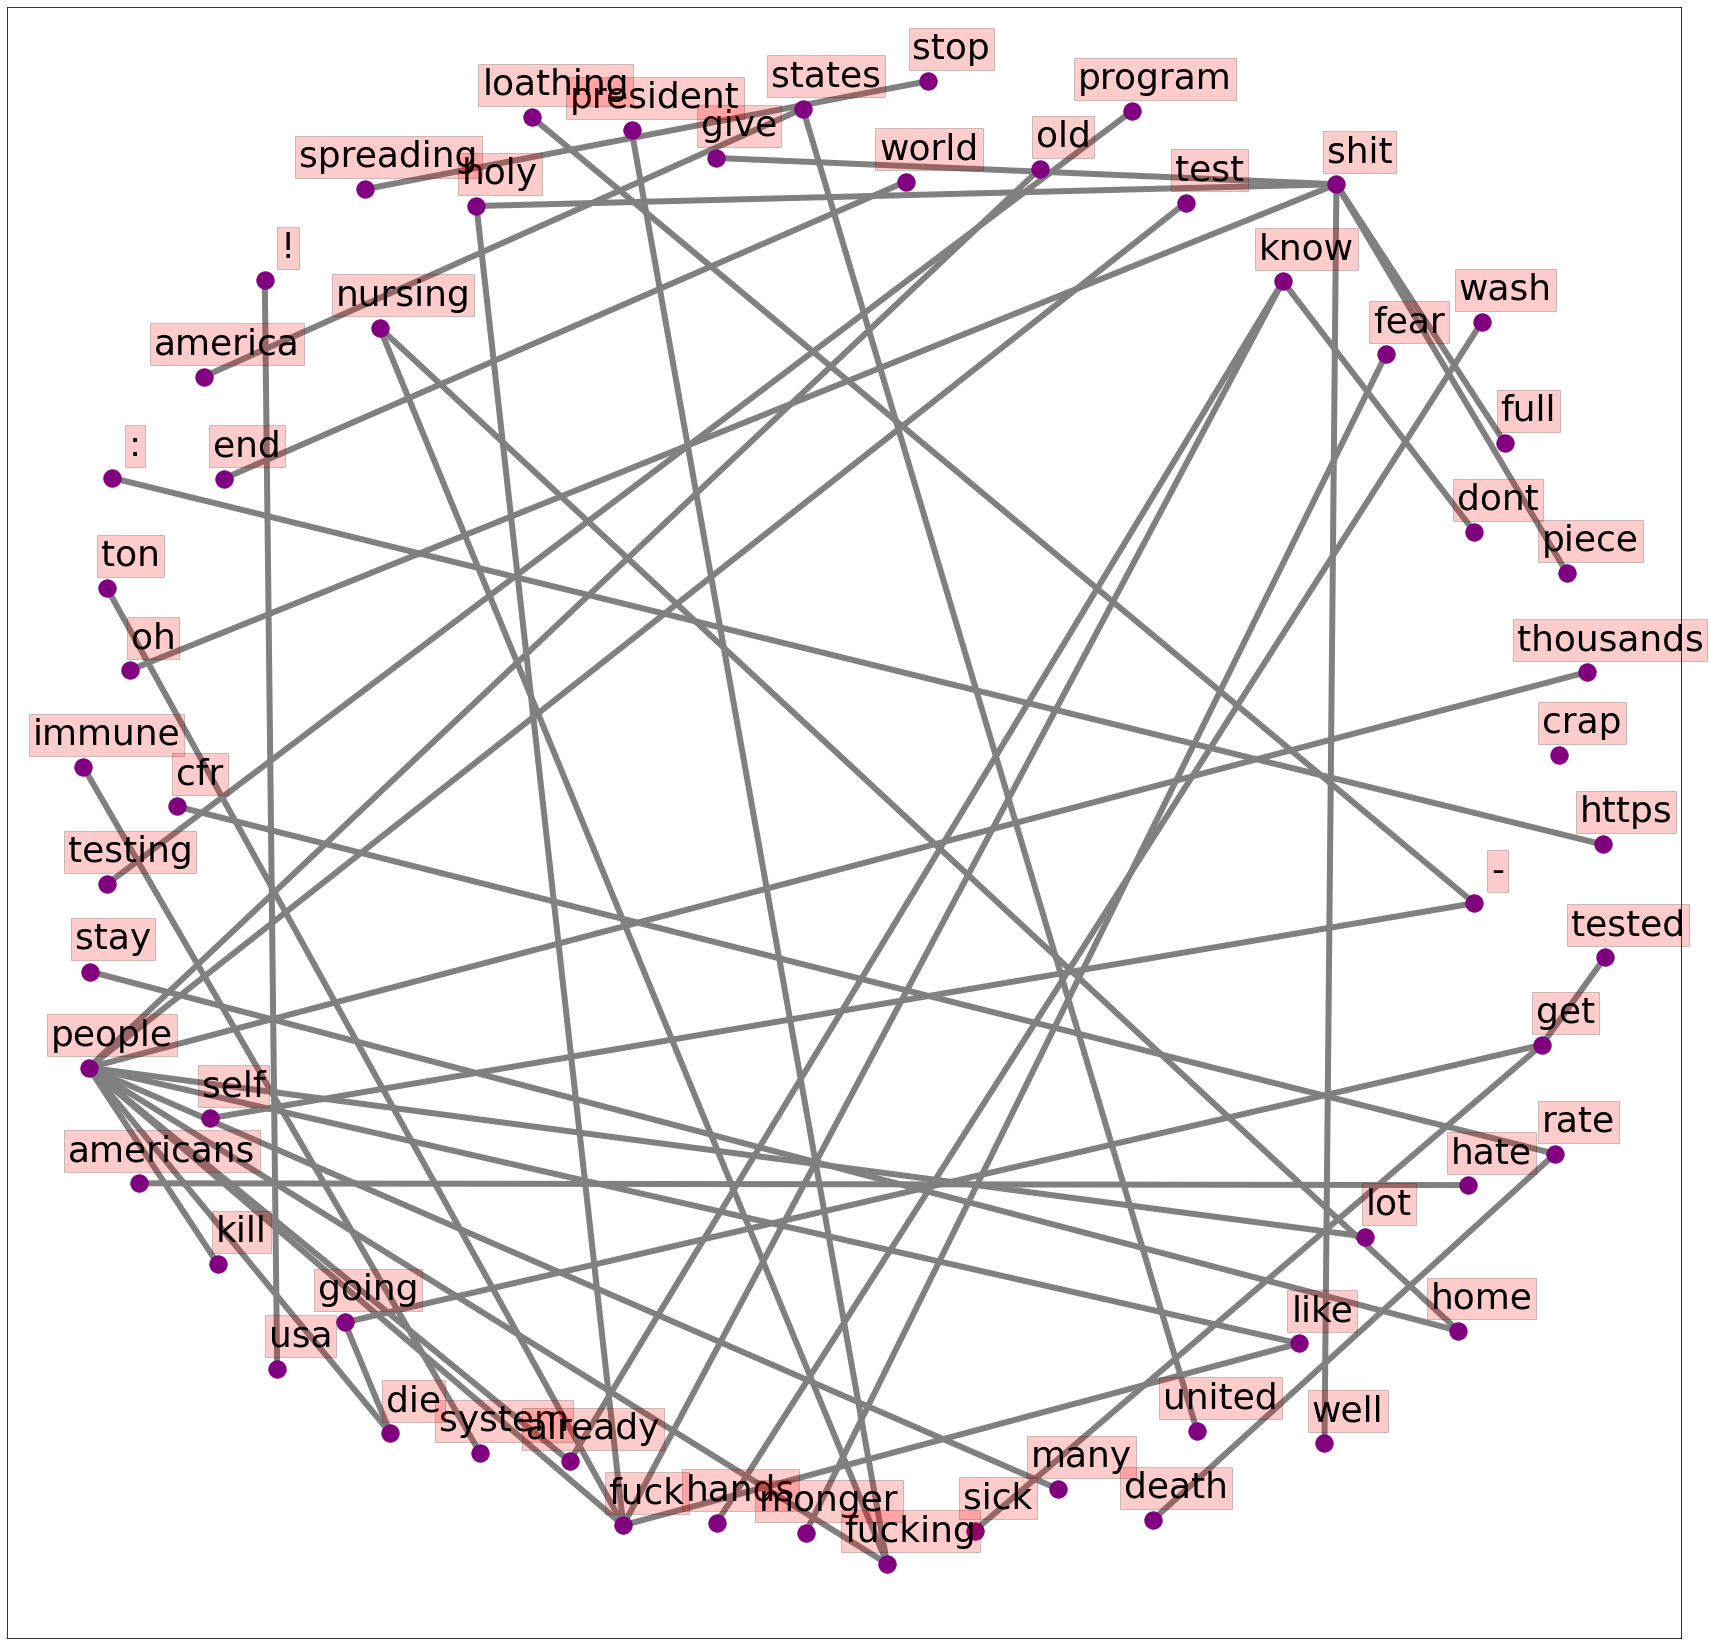

In [77]:
 #creating plot for comments in toxic class
d_toxic = toxic_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_toxic.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()

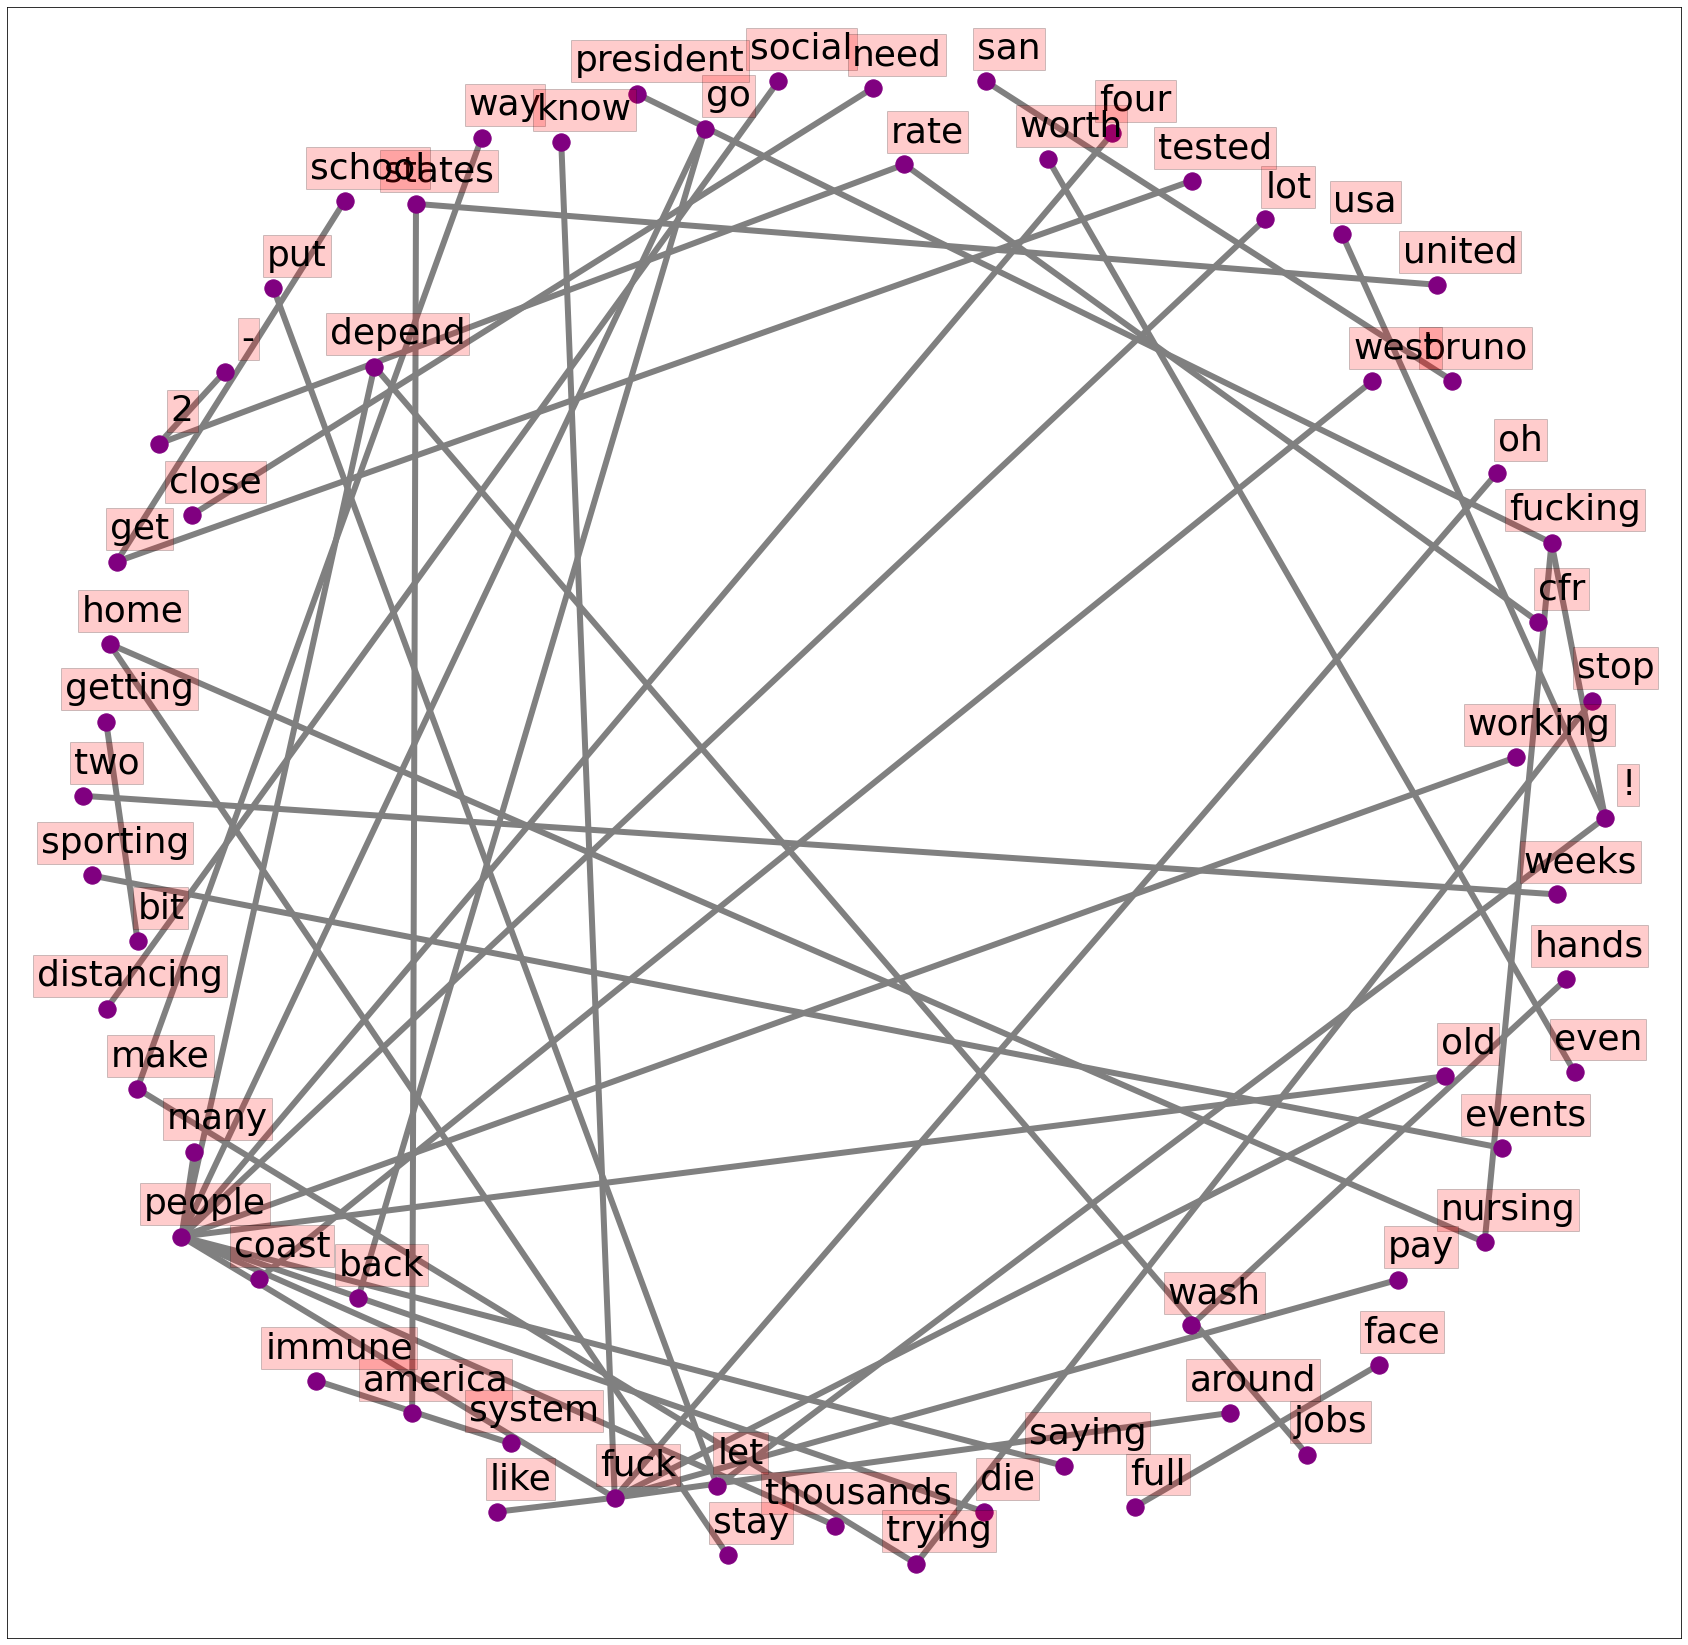

In [79]:
#creating plot for comments in obscene class 
d_obscene = obscene_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_obscene.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()

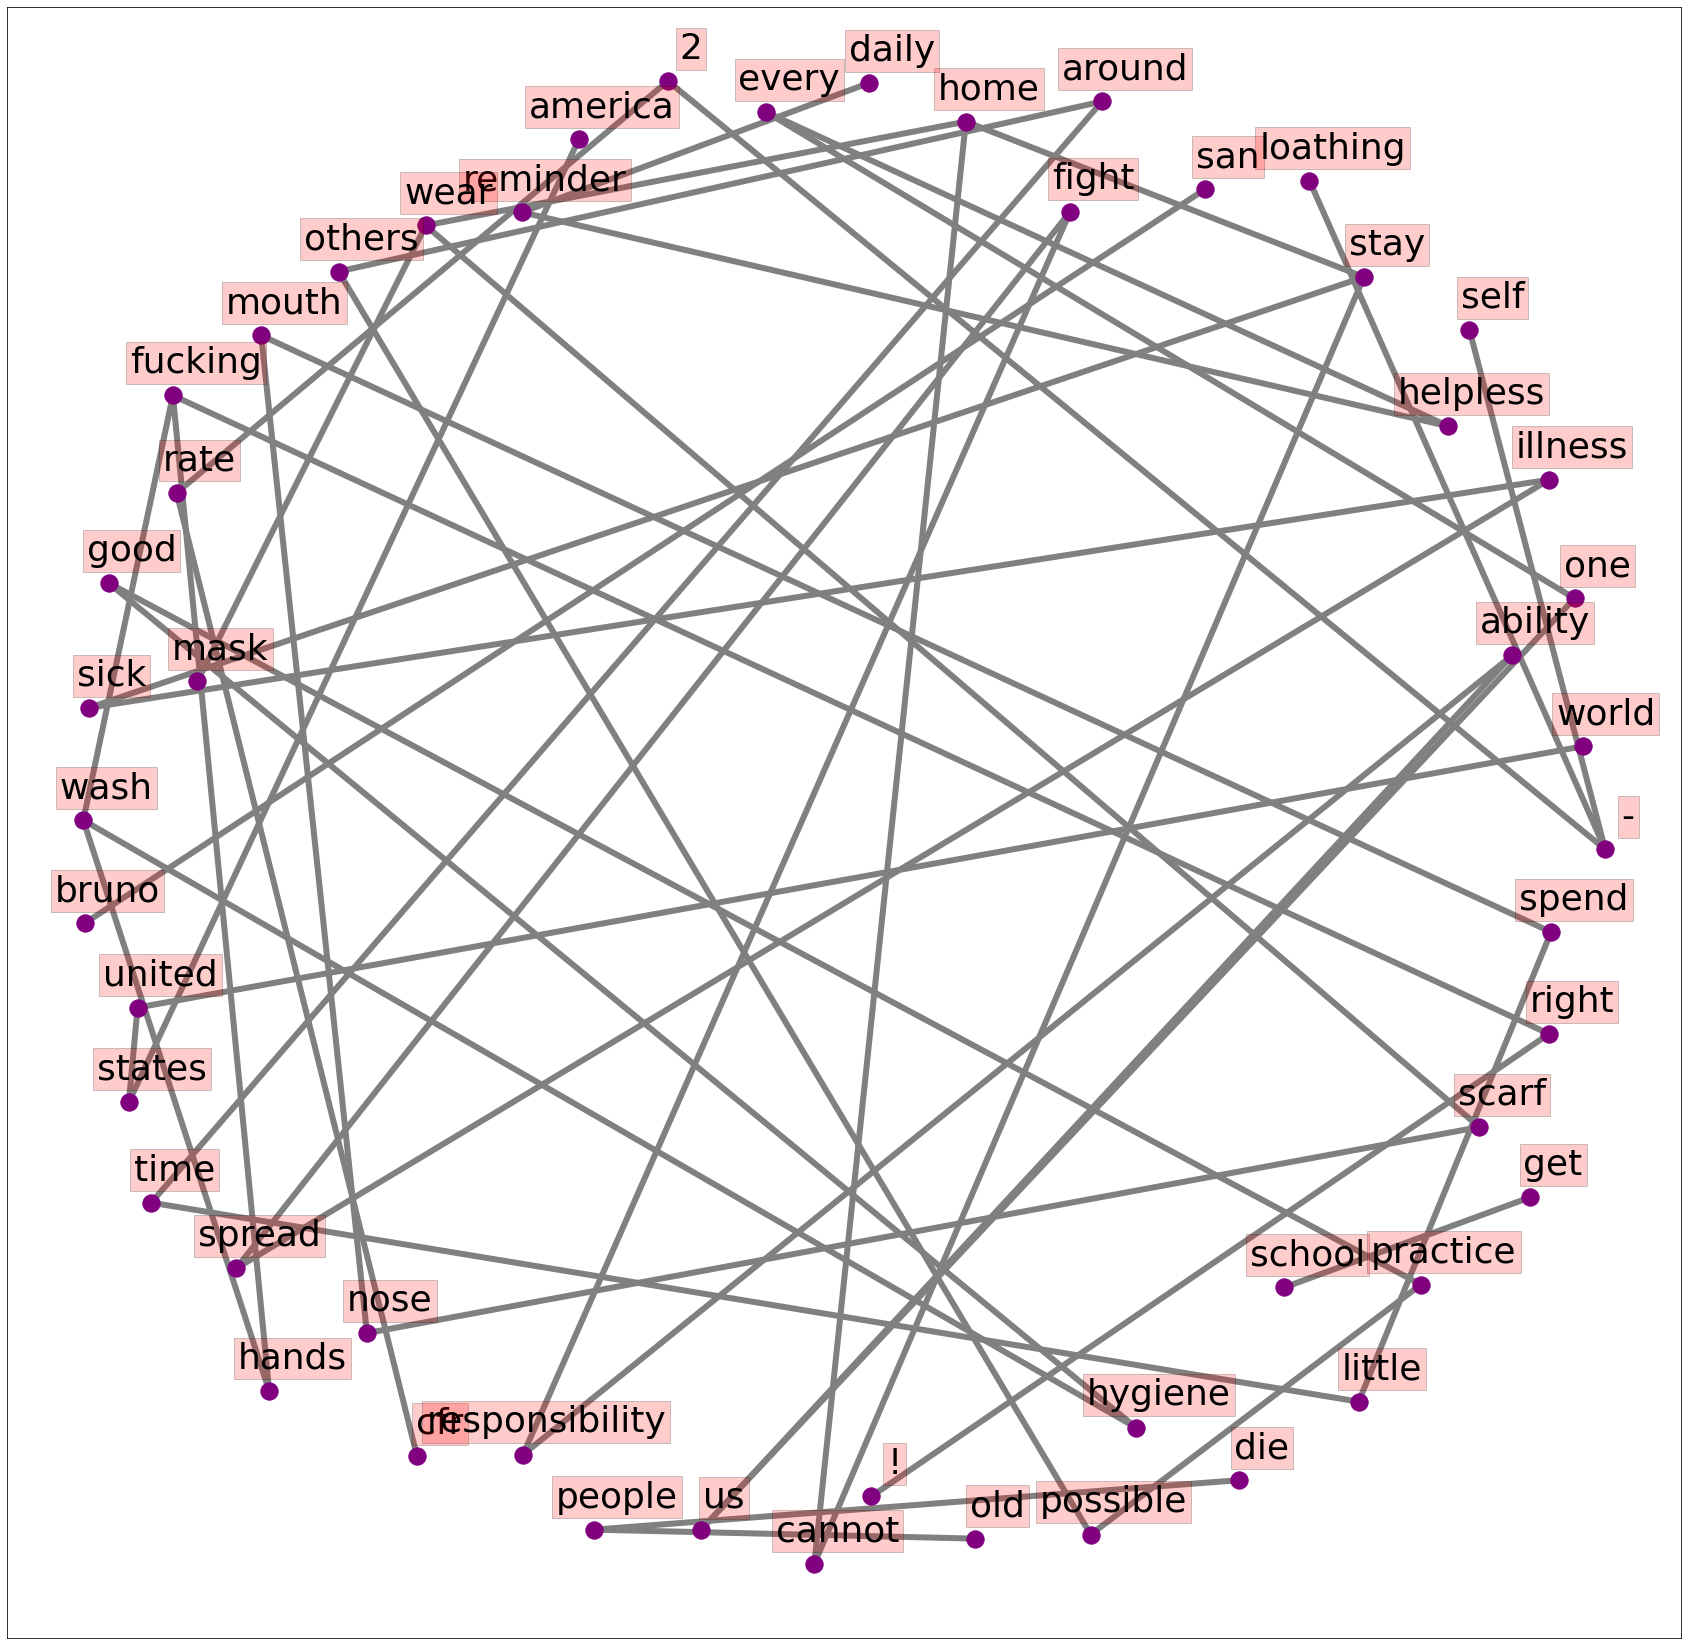

In [81]:
 #creating plot for comments in insult class
d_insult = insult_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_insult.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()

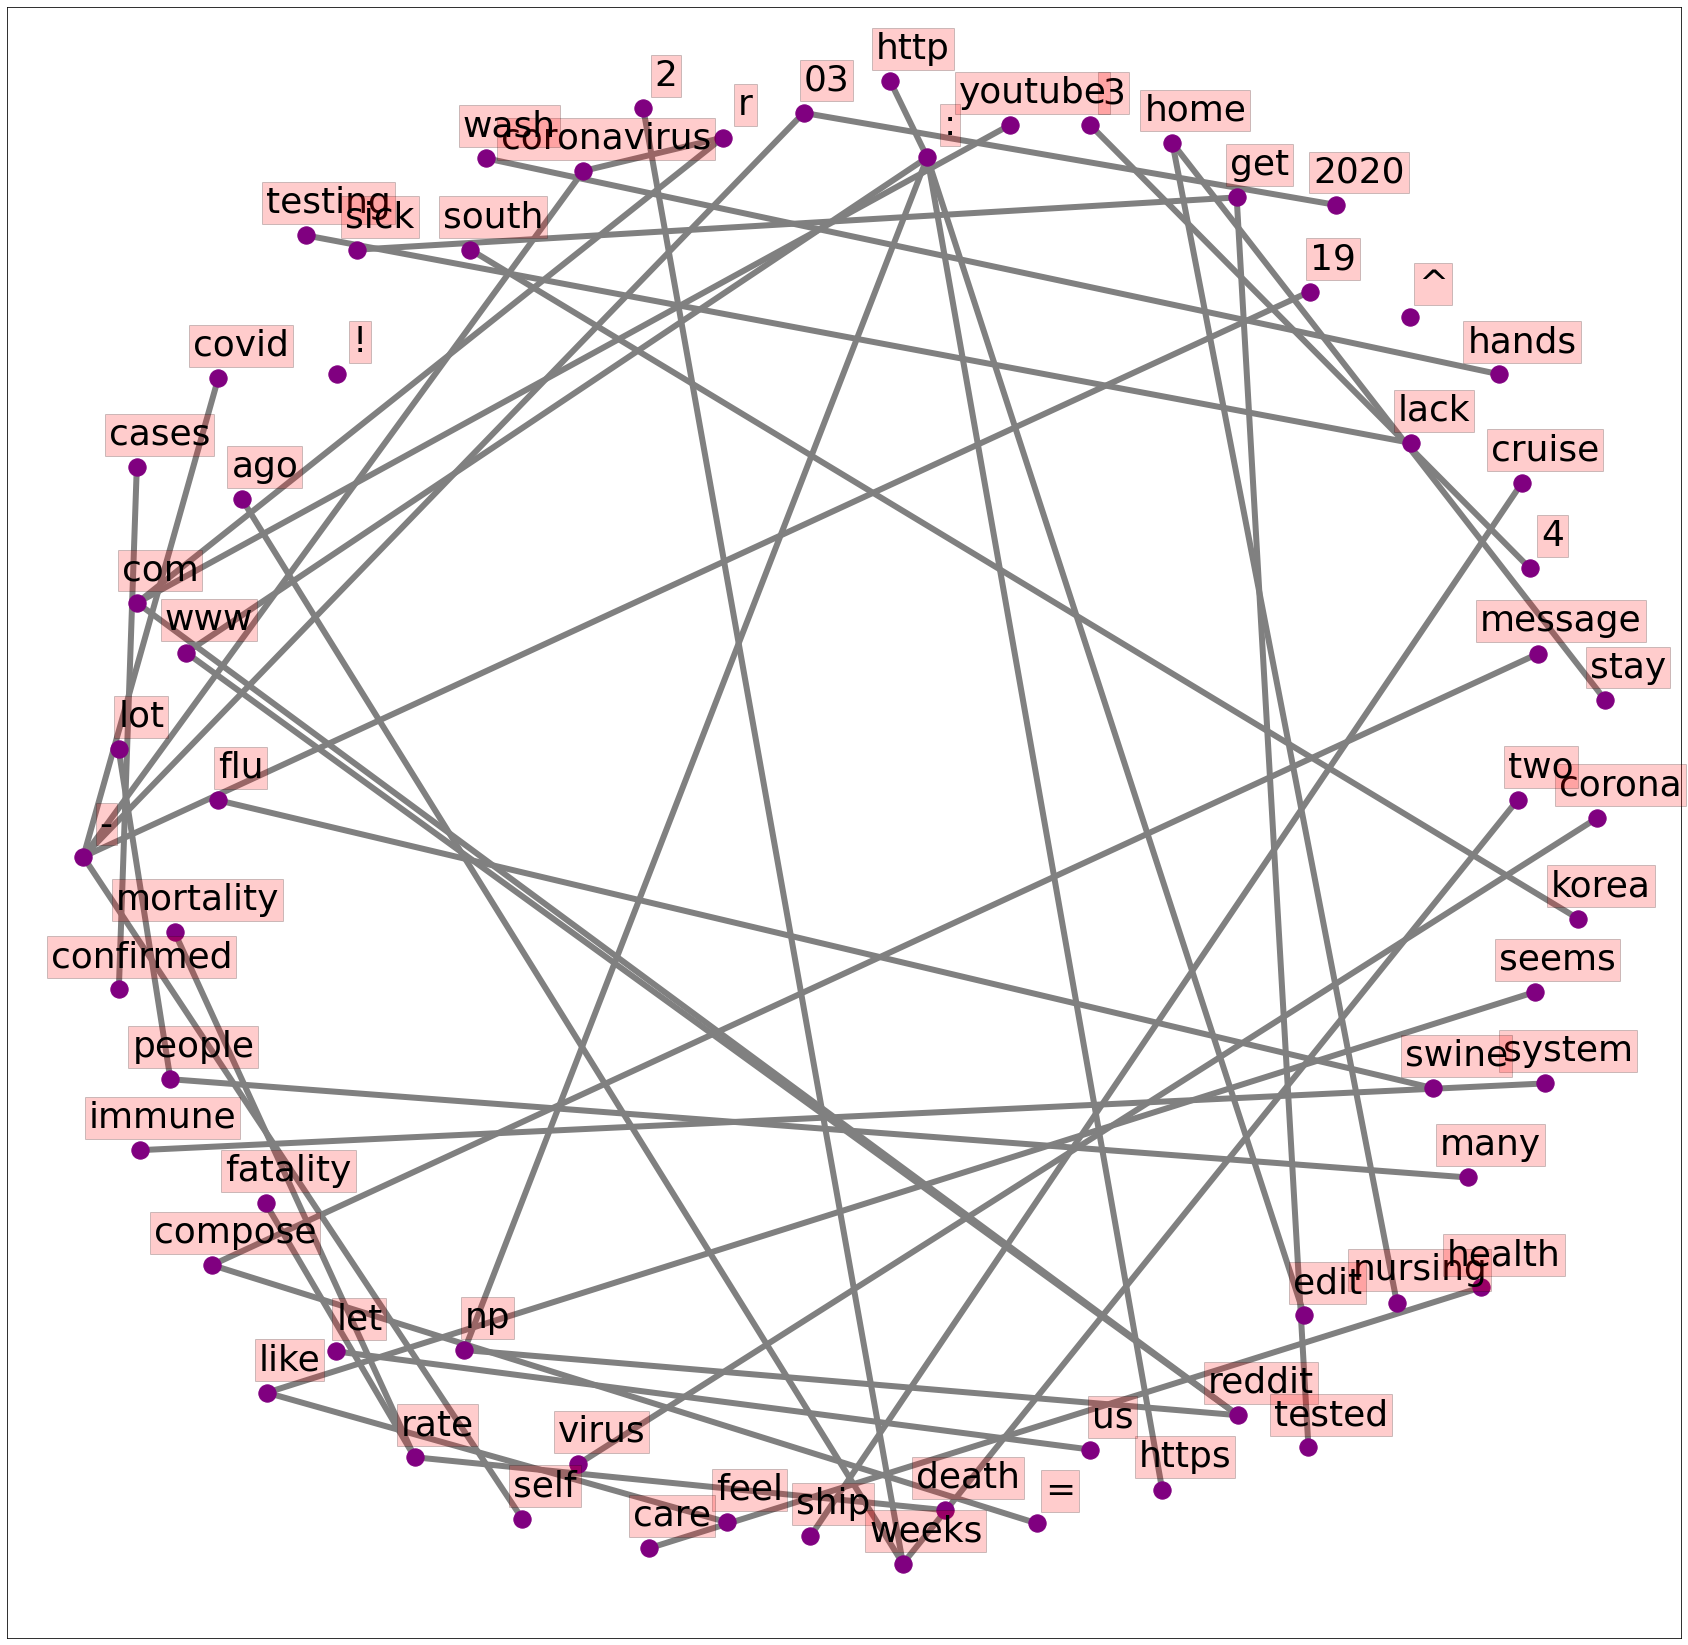

In [82]:
 #creating plot for comments that are non-toxic
d_non_toxic = non_toxic_plot
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d_non_toxic.items():
    G.add_edge(k[0], k[1], weight=(v*0.000001))

fig, ax = plt.subplots(figsize=(30, 30))

pos = nx.spring_layout(G, k=0.5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=6,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x+.03, y+.03,
            s=key,
            bbox=dict(facecolor='red', alpha=0.20),
            horizontalalignment='center', fontsize=36)
    
plt.show()

##**Sentiment Analysis**

In [83]:
#finding average polarity and subjectivity for each of the toxic labels
print('---toxic_subset---')
print('Mean Subjectivity',toxic_subset['Text_Subjectivity'].mean())
print('Mean Polarity',toxic_subset['Text_Polarity'].mean())
print('---severe_toxic_subset---')
print('Mean Subjectivity',severe_toxic_subset['Text_Subjectivity'].mean())
print('Mean Polarity',severe_toxic_subset['Text_Polarity'].mean())
print('---obscene_subset---')
print('Mean Subjectivity',obscene_subset['Text_Subjectivity'].mean())
print('Mean Polarity',obscene_subset['Text_Polarity'].mean())
print('---threat_subset---')
print('Mean Subjectivity',threat_subset['Text_Subjectivity'].mean())
print('Mean Polarity',threat_subset['Text_Polarity'].mean())
print('---insult_subset---')
print('Mean Subjectivity',insult_subset['Text_Subjectivity'].mean())
print('Mean Polarity',insult_subset['Text_Polarity'].mean())
print('---identity_hate_subset---')
print('Mean Subjectivity',identity_hate_subset['Text_Subjectivity'].mean())
print('Mean Polarity',identity_hate_subset['Text_Polarity'].mean())
print('---non_toxic_subset---')
print('Mean Subjectivity',non_toxic_subset['Text_Subjectivity'].mean())
print('Mean Polarity',non_toxic_subset['Text_Polarity'].mean())

---toxic_subset---
Mean Subjectivity 0.6435468492560974
Mean Polarity -0.20704569248511412
---severe_toxic_subset---
Mean Subjectivity 0.6266666666666666
Mean Polarity -0.35
---obscene_subset---
Mean Subjectivity 0.5979311984034567
Mean Polarity -0.18072503572584211
---threat_subset---
Mean Subjectivity 0.43490740740740735
Mean Polarity 0.0028703703703703703
---insult_subset---
Mean Subjectivity 0.6590790725049983
Mean Polarity -0.24542027172318173
---identity_hate_subset---
Mean Subjectivity nan
Mean Polarity nan
---non_toxic_subset---
Mean Subjectivity 0.38806428140834
Mean Polarity 0.05579087215997733
